In [1]:
from analyse import *

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm, Normalize

In [2]:
file_path = '/home/pt426/Impacts/impact-1/sub_neptune_impact'
n_final = 60

In [3]:
pos_initial, m_initial, id_initial, rho_initial, T_initial, P_initial, S_initial, u_initial, mat_id_initial, _ = get_snapshot_data(0, file_path=file_path)

x_initial, y_initial, z_initial = pos_initial[:, 0], pos_initial[:, 1], pos_initial[:, 2]
r_initial = np.sqrt(x_initial ** 2 + y_initial ** 2 + z_initial ** 2)

impactor_ids = id_initial[x_initial > 3]

Could not find gas gamma, assuming 5./3.


In [4]:
impactor_mask_initial = np.isin(id_initial, impactor_ids)
z_mask_initial = (z_initial > -0.1) & (z_initial < 0.1)
forsterite_mask_initial = (mat_id_initial == 400)
iron_mask_initial = (mat_id_initial == 401)
water_mask_initial = (mat_id_initial == 304)

In [5]:
pos, m, id, rho, T, P, S, u, mat_id, vel = get_snapshot_data(n_final, file_path)
x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
r = np.sqrt(x ** 2 + y ** 2 + z ** 2)

Could not find gas gamma, assuming 5./3.


In [6]:
impactor_mask = np.isin(id, impactor_ids)
z_mask = (z > -0.1) & (z < 0.1)
forsterite_mask = (mat_id == 400)
iron_mask = (mat_id == 401)
water_mask = (mat_id == 304)

In [7]:
core_mask = r <= 0.4
mantle_mask = (r <= 0.85) & (r > 0.4)
ocean_mask = (r <= 2.1) & (r > 0.85)
upper_ocean_mask = (r <= 2.1) & (r > 1)
envelope_mask = r > 2.1

core_mask_initial = r_initial <= 0.4
mantle_mask_initial = (r_initial <= 0.85) & (r_initial > 0.4)
ocean_mask_initial = (r_initial <= 2.1) & (r_initial > 0.85)

In [8]:
total_mass = np.sum(m[r < 2.1])

G = 6.67e-11

g = (G * total_mass) / ((2.1 * R_earth) ** 2)

print(g)

9.348686216322287


Could not find gas gamma, assuming 5./3.


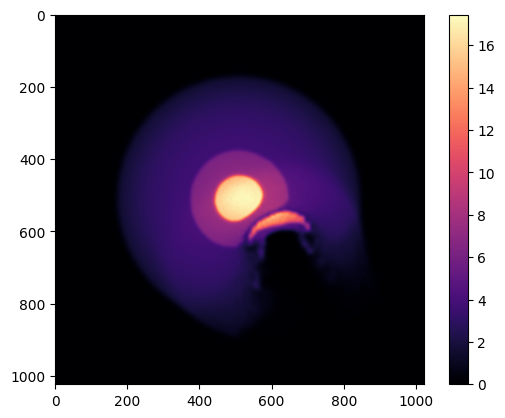

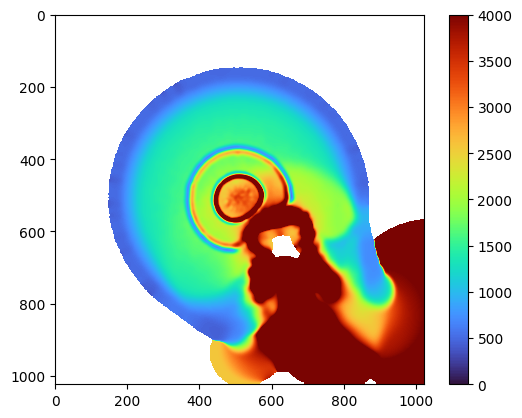

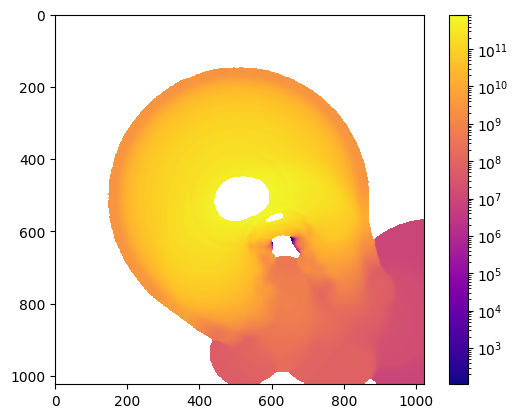

In [9]:
plot(3, file_path=file_path, plot_P=True, plot_T=True)

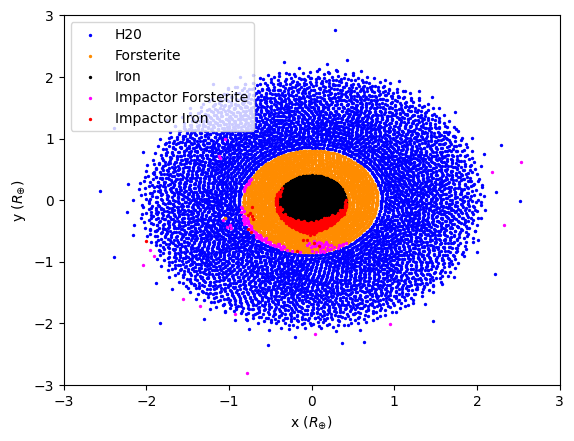

In [10]:
size=2
plt.scatter(x[z_mask & water_mask & ~impactor_mask], y[z_mask & water_mask & ~impactor_mask], s=size, c='blue', label='H20')
plt.scatter(x[z_mask & forsterite_mask & ~impactor_mask], y[z_mask & forsterite_mask & ~impactor_mask], s=size, c='darkorange', label='Forsterite')
plt.scatter(x[z_mask & iron_mask & ~impactor_mask], y[z_mask & iron_mask & ~impactor_mask], s=size, c='black', label='Iron')
plt.scatter(x[z_mask & forsterite_mask & impactor_mask], y[z_mask & forsterite_mask & impactor_mask], s=size, c='magenta', label='Impactor Forsterite')
plt.scatter(x[z_mask & iron_mask & impactor_mask], y[z_mask & iron_mask & impactor_mask], s=size, c='red', label='Impactor Iron')
plt.legend()
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('x ($R_{\oplus}$)')
plt.ylabel('y ($R_{\oplus}$)')
plt.show()

In [11]:
impactor_p_count = np.sum(impactor_mask)
impactor_core_p_count = np.sum(impactor_mask & core_mask)
impactor_mantle_p_count = np.sum(impactor_mask & mantle_mask)
impactor_ocean_p_count = np.sum(impactor_mask & ocean_mask)
impactor_envelope_p_count = np.sum(impactor_mask & envelope_mask)

impactor_mass = np.sum(m[impactor_mask])
impactor_core_mass = np.sum(m[impactor_mask & core_mask])
impactor_mantle_mass = np.sum(m[impactor_mask & mantle_mask])
impactor_ocean_mass = np.sum(m[impactor_mask & ocean_mask])
impactor_upper_ocean_mass = np.sum(m[impactor_mask & upper_ocean_mask])
impactor_envelope_mass = np.sum(m[impactor_mask & envelope_mask])

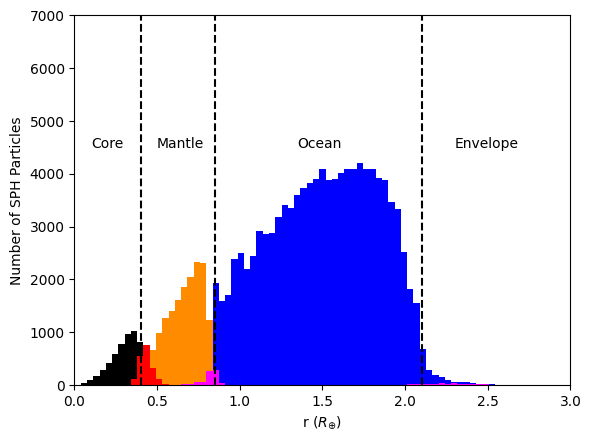

In [12]:
bins = np.linspace(0, 3, num=80)
plt.hist(r[iron_mask & ~impactor_mask], bins, label='Iron', color='black')
plt.hist(r[forsterite_mask & ~impactor_mask], bins, label='Forsterite', color='darkorange')
plt.hist(r[water_mask & ~impactor_mask], bins, label='Water', color='blue')
plt.hist(r[iron_mask & impactor_mask], bins, label='Impactor Iron', color='red')
plt.hist(r[forsterite_mask & impactor_mask], bins, label='Impactor Forsterite', color='magenta')

plt.axvline(0.4, color='black', linestyle='--')
plt.axvline(0.85, color='black', linestyle='--')
plt.axvline(2.1, color='black', linestyle='--')

plt.annotate('Core', (0.1, 4500))
plt.annotate('Mantle', (0.5, 4500))
plt.annotate('Ocean', (1.35, 4500))
plt.annotate('Envelope', (2.3, 4500))

plt.ylim([0, 7000])
plt.xlim([0, 3])
plt.ylabel('Number of SPH Particles')
plt.xlabel('r ($R_{\oplus}$)')
plt.show()

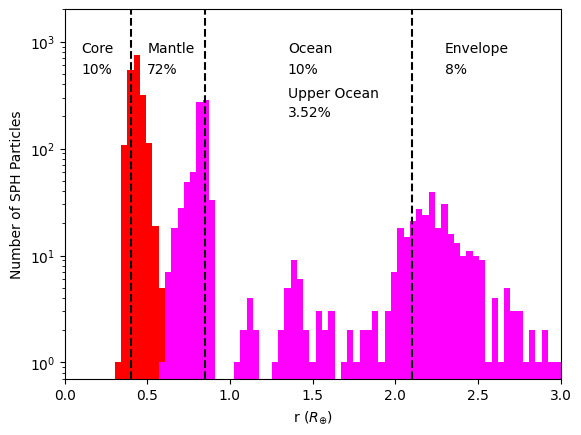

In [13]:
plt.hist(r[iron_mask & impactor_mask], bins, label='Impactor Iron', color='red')
plt.hist(r[forsterite_mask & impactor_mask], bins, label='Impactor Forsterite', color='magenta')

plt.axvline(0.4, color='black', linestyle='--')
plt.axvline(0.85, color='black', linestyle='--')
plt.axvline(2.1, color='black', linestyle='--')

plt.annotate('Core', (0.1, 800))
plt.annotate('Mantle', (0.5, 800))
plt.annotate('Ocean', (1.35, 800))
plt.annotate('Envelope', (2.3, 800))

plt.annotate(f'{impactor_core_mass/ impactor_mass:.0%}', (0.1, 500))
plt.annotate(f'{impactor_mantle_mass / impactor_mass:.0%}', (0.5, 500))
plt.annotate(f'{impactor_ocean_mass / impactor_mass:.0%}', (1.35, 500))
plt.annotate(f'{impactor_envelope_mass / impactor_mass:.0%}', (2.3, 500))

plt.annotate(f'Upper Ocean', (1.35, 300))
plt.annotate(f'{impactor_upper_ocean_mass / impactor_mass:.2%}', (1.35, 200))

plt.yscale('log')
plt.xlim([0, 3])
plt.ylim([0.7, 2e3])
plt.ylabel('Number of SPH Particles')
plt.xlabel('r ($R_{\oplus}$)')
plt.show()

In [14]:
bins = np.linspace(0, 3, num=20)

E_density = u * rho
E_density_initial = u_initial * rho_initial

E_hist, _ = np.histogram(r[~impactor_mask], bins, weights=(u * m)[~impactor_mask])
E_hist_initial, _ = np.histogram(r_initial, bins, weights=u_initial * m_initial)

m_hist, _ = np.histogram(r, bins, weights=u)
m_hist_initial, _ = np.histogram(r_initial, bins, weights=m_initial)

vol = ((4 / 3) * np.pi * (np.roll(bins, -1) ** 3 - bins ** 3))[:-1] * (R_earth ** 3)

E_density_hist = E_hist / vol
E_density_initial_hist = E_hist_initial / vol

widths = (np.roll(bins, -1) - bins)[:-1]

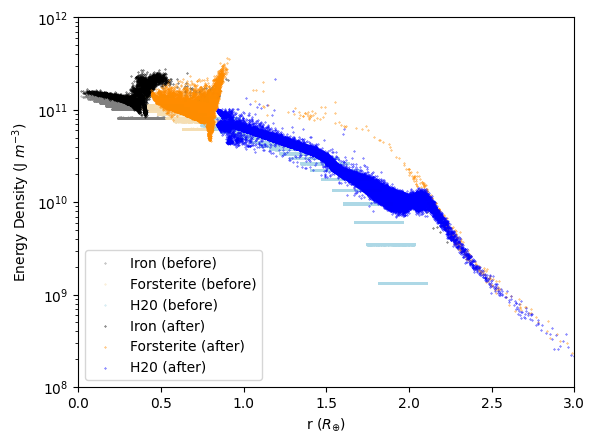

In [15]:
size = 0.1
plt.scatter(r_initial[iron_mask_initial], E_density_initial[iron_mask_initial], s=size,  c='grey', label='Iron (before)')
plt.scatter(r_initial[forsterite_mask_initial], E_density_initial[forsterite_mask_initial], s=size,  c='wheat', label='Forsterite (before)')
plt.scatter(r_initial[water_mask_initial], E_density_initial[water_mask_initial], s=size,  c='lightblue', label='H20 (before)')

plt.scatter(r[iron_mask], E_density[iron_mask], s=size,  c='black', label='Iron (after)')
plt.scatter(r[forsterite_mask], E_density[forsterite_mask], s=size,  c='darkorange', label='Forsterite (after)')
plt.scatter(r[water_mask], E_density[water_mask], s=size,  c='blue', label='H20 (after)')

plt.xlim([0, 3])
plt.ylim([1e8, 1e12])
plt.yscale('log')
plt.xlabel('r ($R_{\oplus}$)')
plt.ylabel('Energy Density (J $m^{-3}$)')
plt.legend()
plt.show()

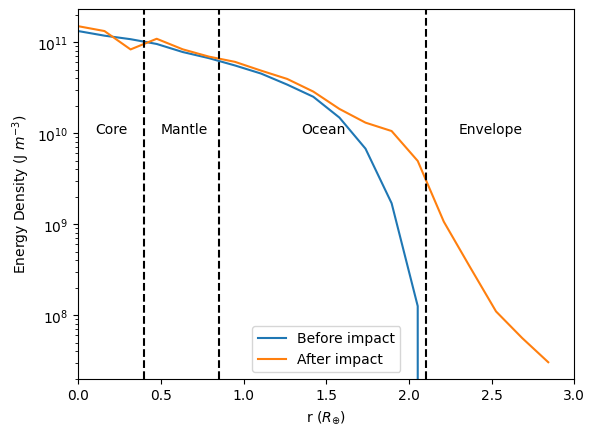

In [16]:
plt.plot(bins[:-1], E_density_initial_hist, label='Before impact')
plt.plot(bins[:-1], E_density_hist, label='After impact')
plt.legend()

plt.axvline(0.4, color='black', linestyle='--')
plt.axvline(0.85, color='black', linestyle='--')
plt.axvline(2.1, color='black', linestyle='--')

plt.annotate('Core', (0.1, 1e10))
plt.annotate('Mantle', (0.5, 1e10))
plt.annotate('Ocean', (1.35, 1e10))
plt.annotate('Envelope', (2.3, 1e10))

plt.yscale('log')
plt.xlim([0, 3])
plt.xlabel('r ($R_{\oplus}$)')
plt.ylabel('Energy Density (J $m^{-3}$)')
plt.show()

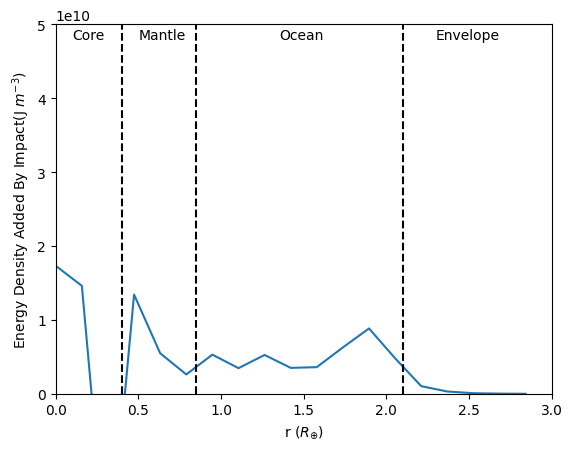

In [17]:
plt.plot(bins[:-1], E_density_hist - E_density_initial_hist, label='Before impact')

plt.axvline(0.4, color='black', linestyle='--')
plt.axvline(0.85, color='black', linestyle='--')
plt.axvline(2.1, color='black', linestyle='--')

plt.annotate('Core', (0.1, 4.8e10))
plt.annotate('Mantle', (0.5, 4.8e10))
plt.annotate('Ocean', (1.35, 4.8e10))
plt.annotate('Envelope', (2.3, 4.8e10))

plt.xlim([0, 3])
plt.ylim([0, 5e10])
plt.xlabel('r ($R_{\oplus}$)')
plt.ylabel('Energy Density Added By Impact(J $m^{-3}$)')
plt.show()

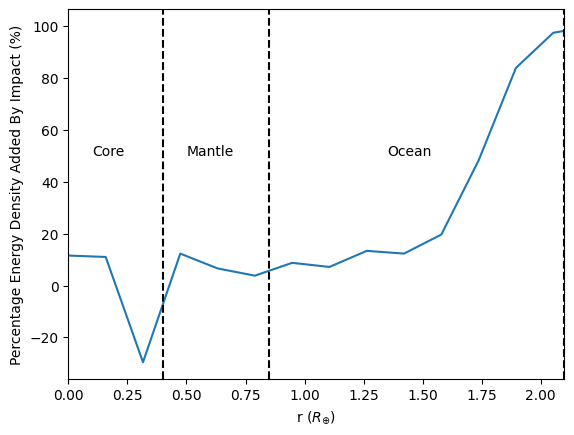

In [18]:
plt.plot(bins[:-1],  100 * (E_density_hist - E_density_initial_hist) / E_density_hist, label='Before impact')

plt.axvline(0.4, color='black', linestyle='--')
plt.axvline(0.85, color='black', linestyle='--')
plt.axvline(2.1, color='black', linestyle='--')

plt.annotate('Core', (0.1, 50))
plt.annotate('Mantle', (0.5, 50))
plt.annotate('Ocean', (1.35, 50))
plt.annotate('Envelope', (2.3, 50))

plt.xlim([0, 2.1])
plt.xlabel('r ($R_{\oplus}$)')
plt.ylabel('Percentage Energy Density Added By Impact (%)')
plt.show()

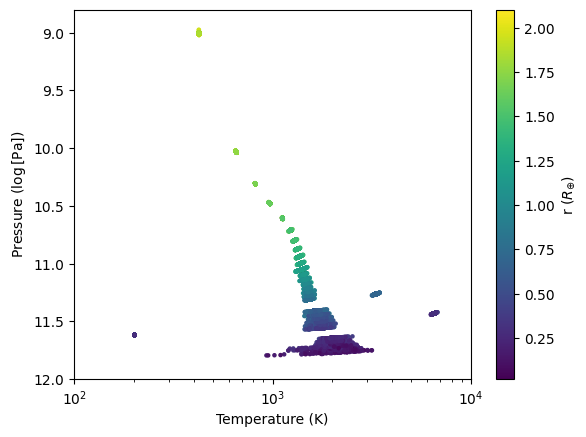

In [19]:
mask = (r_initial < 2.2)
plt.scatter(T_initial[mask], np.log10(P_initial[mask]), c=r_initial[mask], s=5)
plt.colorbar(label='r ($R_{\oplus}$)')
plt.xscale('log')
plt.xlim([1e2, 1e4])
plt.ylim([12, 8.8])
plt.ylabel('Pressure ($\log$[Pa])')
plt.xlabel('Temperature (K)')
plt.show()

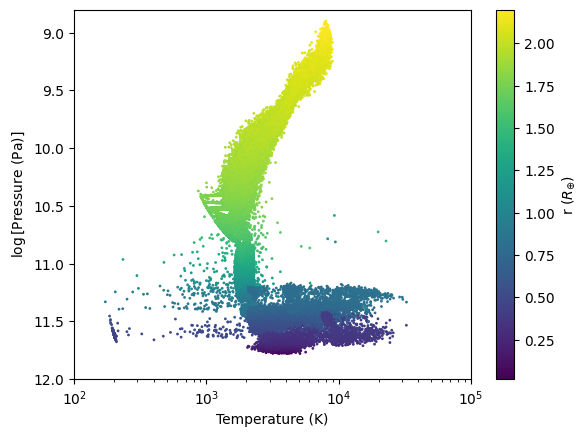

In [20]:
mask = (r < 2.2) & ~impactor_mask
plt.scatter(T[mask], np.log10(P[mask]), c=r[mask], s=1)
plt.colorbar(label='r ($R_{\oplus}$)')
plt.xscale('log')
plt.ylim([12, 8.8])
plt.xlim([1e2, 1e5])
plt.ylabel('$\log$[Pressure (Pa)]')
plt.xlabel('Temperature (K)')
plt.show()

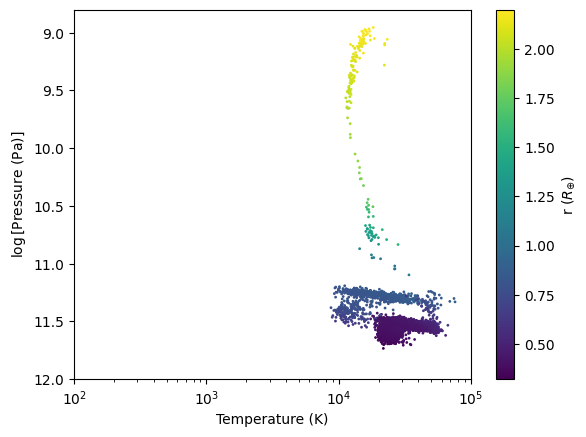

In [21]:
mask = (r < 2.2) & impactor_mask
plt.scatter(T[mask], np.log10(P[mask]), c=r[mask], s=1)
plt.colorbar(label='r ($R_{\oplus}$)')
plt.xscale('log')
plt.ylim([12, 8.8])
plt.xlim([1e2, 1e5])
plt.ylabel('$\log$[Pressure (Pa)]')
plt.xlabel('Temperature (K)')
plt.show()

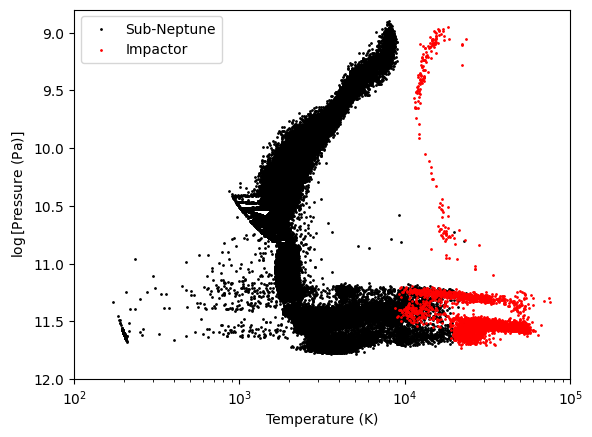

In [22]:
mask1 = (r < 2.2) & impactor_mask
mask2 = (r < 2.2) & ~impactor_mask
plt.scatter(T[mask2], np.log10(P[mask2]), c='black', s=1, label='Sub-Neptune')
plt.scatter(T[mask1], np.log10(P[mask1]), c='red', s=1, label='Impactor')
plt.legend()
plt.xscale('log')
plt.ylim([12, 8.8])
plt.xlim([1e2, 1e5])
plt.ylabel('$\log$[Pressure (Pa)]')
plt.xlabel('Temperature (K)')
plt.show()

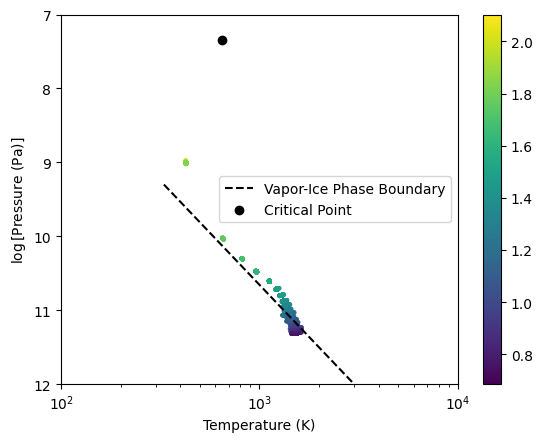

In [23]:
mask = water_mask_initial
plt.scatter(T_initial[mask], np.log10(P_initial[mask]), c=r_initial[mask], s=5)
plt.colorbar()
plt.plot([330, 3000], [9.3, 12], 'k--', label='Vapor-Ice Phase Boundary')
plt.scatter(650, np.log10(22e6), c='black', label='Critical Point')
plt.legend(loc='center right')
plt.xscale('log')
plt.xlim([1e2, 1e4])
plt.ylim([12, 7])
plt.ylabel('$\log$[Pressure (Pa)]')
plt.xlabel('Temperature (K)')
plt.show()

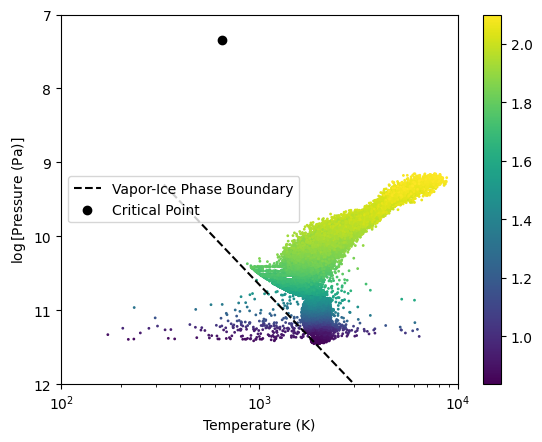

In [24]:
mask = water_mask & (r < 2.1)
plt.scatter(T[mask], np.log10(P[mask]), c=r[mask], s=1)
plt.colorbar()
plt.plot([330, 3000], [9.3, 12], 'k--', label='Vapor-Ice Phase Boundary')
plt.scatter(650, np.log10(22e6), c='black', label='Critical Point')
plt.xscale('log')
plt.legend(loc='center left')
plt.ylim([12, 7])
plt.xlim([1e2, 1e4])
plt.ylabel('$\log$[Pressure (Pa)]')
plt.xlabel('Temperature (K)')
plt.show()

In [25]:
E_ocean_before = np.sum((u_initial * m_initial)[ocean_mask_initial])
E_ocean_after = np.sum((u * m)[ocean_mask])
E_excess_ocean = E_ocean_after - E_ocean_before

E_mantle_before = np.sum((u_initial * m_initial)[mantle_mask_initial])
E_mantle_after = np.sum((u * m)[mantle_mask])
E_excess_mantle = E_mantle_after - E_mantle_before

E_core_before = np.sum((u_initial * m_initial)[core_mask_initial])
E_core_after = np.sum((u * m)[core_mask])
E_excess_core = E_core_after - E_core_before

print('Excess energy in ocean')
print(f'{E_excess_ocean:.4e} J = {E_ocean_after:.4e} J - {E_ocean_before:.4e} J')
print('Excess energy in mantle')
print(f'{E_excess_mantle:.4e} J = {E_mantle_after:.4e} J - {E_mantle_before:.4e} J')
print('Excess energy in core')
print(f'{E_excess_core:.4e} J = {E_core_after:.4e} J - {E_core_before:.4e} J')

Excess energy in ocean
5.7664e+31 J = 2.3375e+32 J - 1.7609e+32 J
Excess energy in mantle
1.1502e+31 J = 6.0937e+31 J - 4.9435e+31 J
Excess energy in core
1.3584e+30 J = 9.3900e+30 J - 8.0316e+30 J


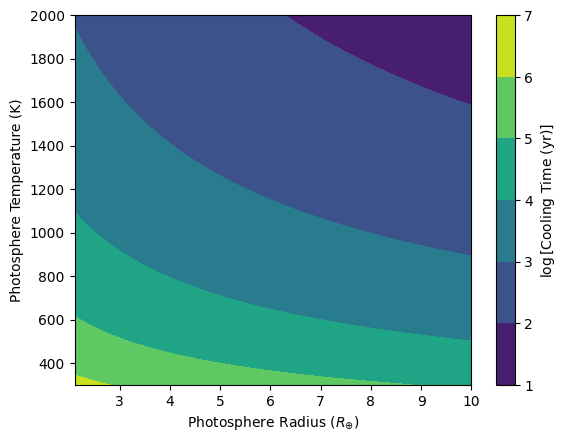

In [26]:
R_phot, T_phot = np.meshgrid(np.linspace(2.1, 10) * R_earth, np.linspace(300, 2000))
sigma = 5.67e-8
L = 4 * np.pi * R_phot ** 2 * sigma * T_phot ** 4
cooling_time = E_excess_ocean / L

plt.contourf(R_phot / R_earth, T_phot, np.log10(cooling_time / (365.25 * 24 * 3600)), [1, 2, 3, 4, 5, 6, 7])
plt.colorbar(label='$\log$[Cooling Time (yr)]')
plt.xlabel('Photosphere Radius ($R_{\oplus}$)')
plt.ylabel('Photosphere Temperature (K)')
plt.show()

Could not find gas gamma, assuming 5./3.


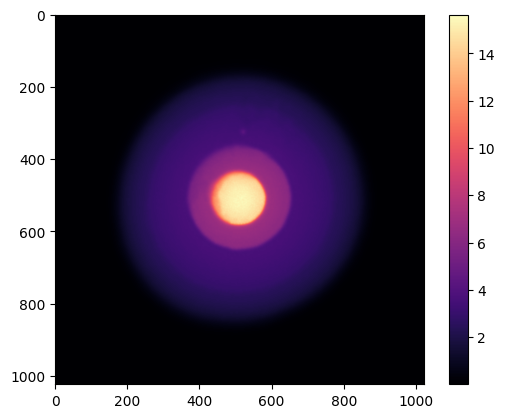

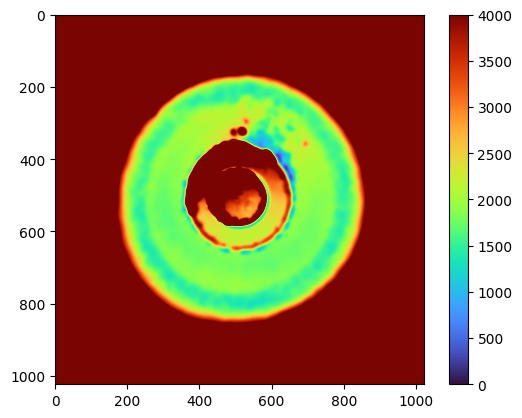

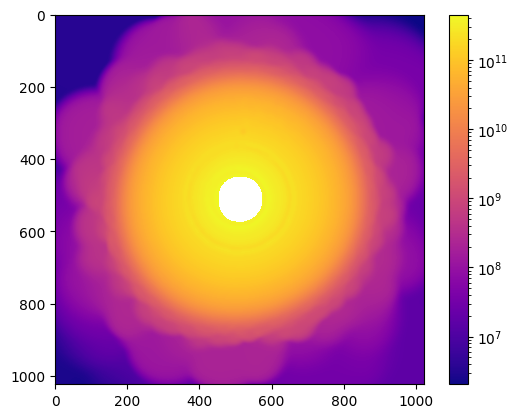

In [27]:
plot(50, file_path=file_path, plot_P=True, plot_T=True)

Could not find gas gamma, assuming 5./3.


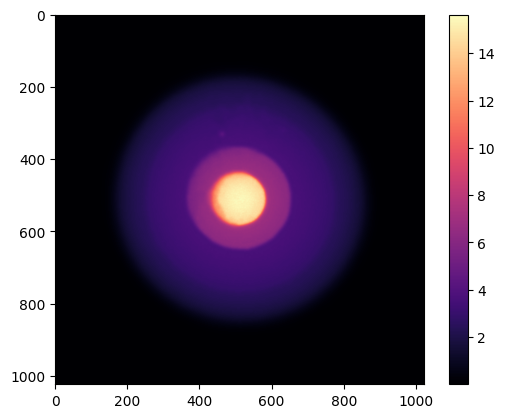

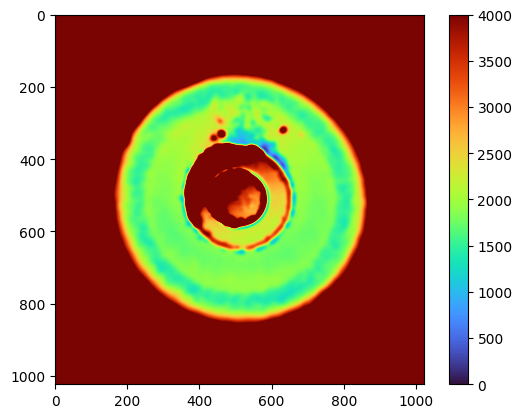

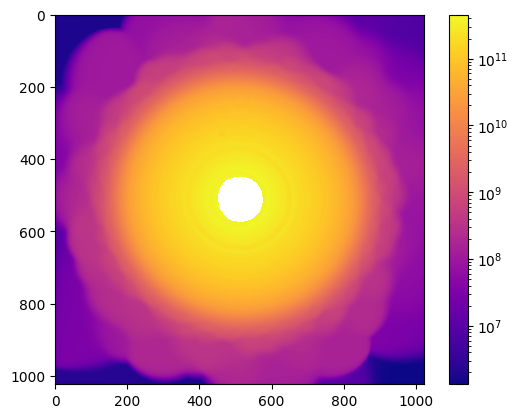

In [28]:
plot(n_final, file_path=file_path, plot_P=True, plot_T=True)

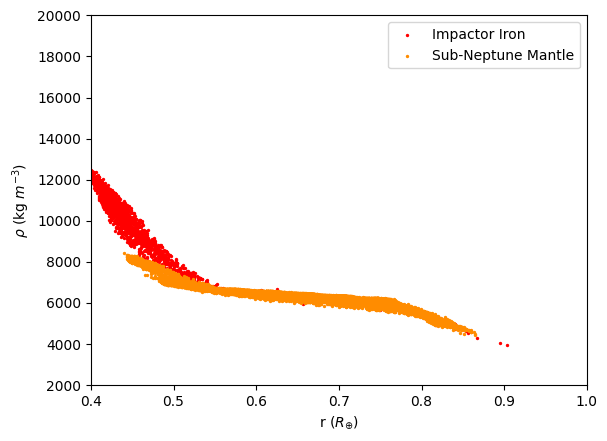

In [29]:
size = 2
plt.scatter(r[impactor_mask & iron_mask], rho[impactor_mask & iron_mask], label='Impactor Iron', c='red', s=size)
plt.scatter(r[~impactor_mask & forsterite_mask], rho[~impactor_mask & forsterite_mask], label='Sub-Neptune Mantle', c='darkorange', s=size)
plt.xlim([0.4, 1])
plt.ylim([2e3, 2e4])
# plt.yscale('log')
plt.xlabel('r ($R_{\oplus}$)')
plt.ylabel('$\\rho$ (kg $m^{-3}$)')
plt.legend()
plt.show()

In [30]:
v_x, v_y, v_z = vel[:, 0], vel[:, 1], vel[:, 2]
r_scalar = np.array([r]).T
r_unit = pos / r_scalar
v_r = np.sum(r_unit * vel, axis=1)

[]

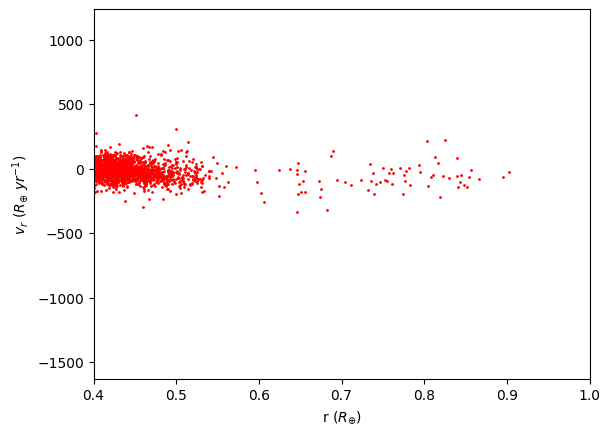

In [31]:
plt.scatter(r[impactor_mask & iron_mask], v_r[impactor_mask & iron_mask] * (365.25 * 24 * 3600), label='Impactor Iron', c='red', s=1)
plt.xlim([0.4, 1])
plt.xlabel('r ($R_{\oplus}$)')
plt.ylabel('$v_{r}$ ($R_{\oplus}$ $yr^{-1}$)')
plt.plot()

In [32]:
E = u * m
V = m / rho
A = V ** (2/3)
sigma = 5.67e-8

t_cool = E / (A * sigma * (T ** 4))

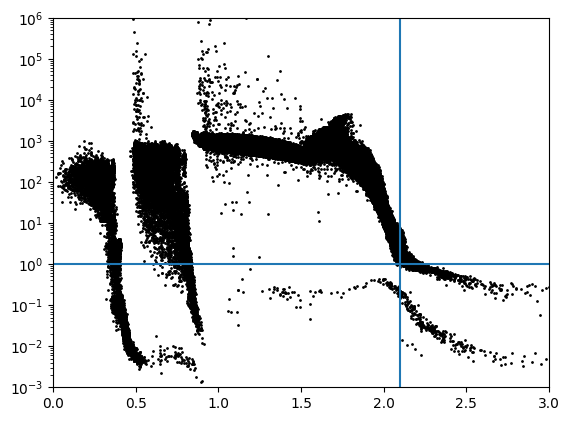

In [33]:
plt.scatter(r, t_cool / 3.1e7, s=1, c='black')
plt.yscale('log')
plt.xlim([0, 3])
plt.ylim([1e-3, 1e6])
plt.axhline(1)
plt.axvline(2.1)
plt.show()

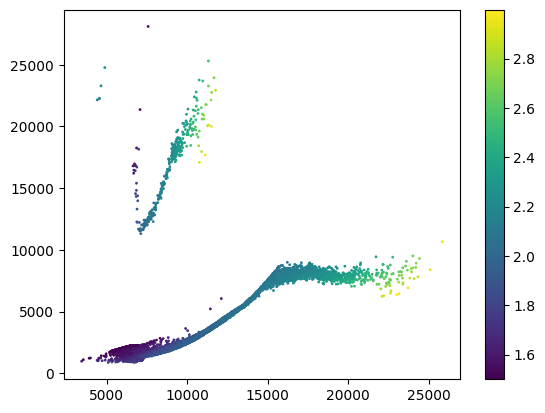

In [34]:
mask = (r < 3) & (r > 1.5)
plt.scatter(S[mask], T[mask], s=1, c=r[mask])
plt.colorbar()
plt.show()

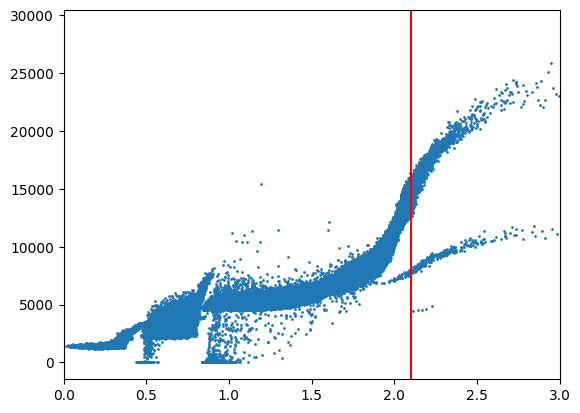

In [35]:
plt.scatter(r, S, s=1)
plt.axvline(2.1, color='red')
plt.xlim([0, 3])
plt.show()

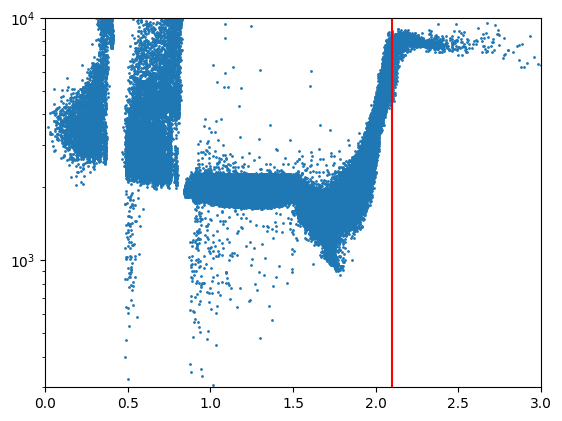

In [36]:
plt.scatter(r, T, s=1)
plt.xlim([0, 3])
plt.yscale('log')
plt.ylim(300, 10000)
plt.axvline(2.1, color='red')
plt.show()

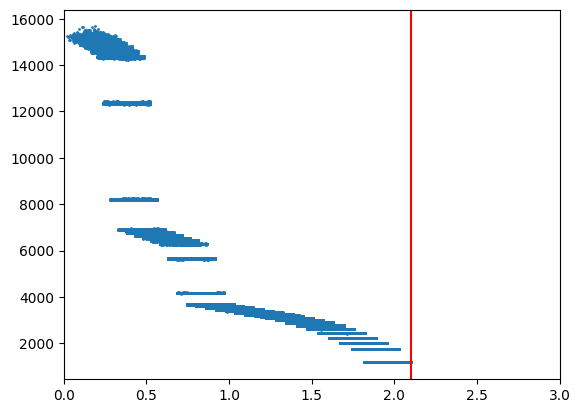

In [41]:
plt.scatter(r_initial, rho_initial, s=1)
plt.xlim([0, 3])
plt.axvline(2.1, color='red')
plt.show()